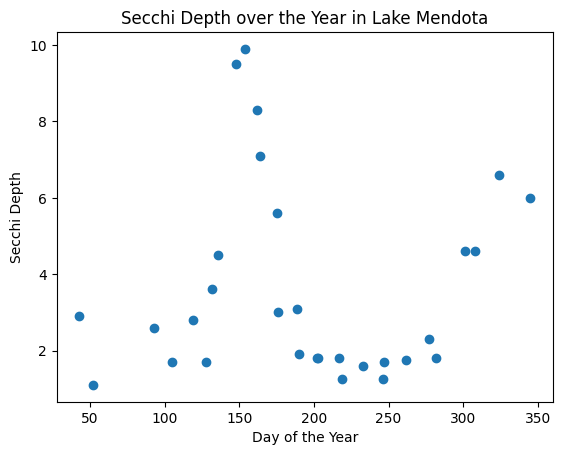

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year'].values.reshape(-1, 1) 
y = df['secchi_depth'].values
n = 30

plt.scatter(x, y)
plt.xlabel('Day of the Year')
plt.ylabel('Secchi Depth')
plt.title('Secchi Depth over the Year in Lake Mendota')
plt.show()

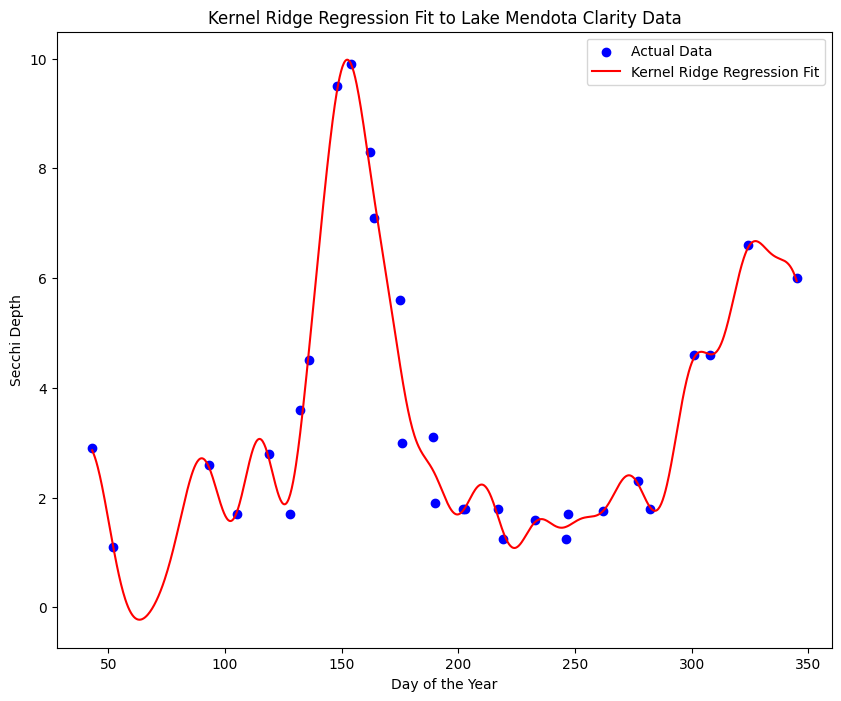

In [31]:
# Re-implementing the kernel ridge regression with the correct data and parameters

# We need to redefine the Gaussian kernel, as it wasn't included in the original snippet
def gaussian_kernel(x, x_prime, sigma):
    return np.exp(-np.sum((x - x_prime)**2, axis=1) / (2 * sigma**2))

# Kernel ridge regression function
def kernel_ridge_regression(x_train, y_train, x_test, sigma, lam):
    n_train = x_train.shape[0]
    n_test = x_test.shape[0]
    
    # Construct the kernel matrix for training data
    K = np.zeros((n_train, n_train))
    for i in range(n_train):
        K[i, :] = gaussian_kernel(x_train, x_train[i, :], sigma)
    
    # Compute the alpha coefficients
    alpha = np.linalg.inv(K + lam * np.eye(n_train)) @ y_train
    
    # Predictions for test data
    predictions = np.zeros(n_test)
    for i in range(n_test):
        k_test = gaussian_kernel(x_train, x_test[i, :], sigma)
        predictions[i] = k_test @ alpha
    
    return predictions

# Parameters
sigma = 10  # scale parameter for the Gaussian kernel
lam = 0.01  # regularization parameter

# Prepare test data for plotting
x_test = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)

# Perform kernel ridge regression
predictions = kernel_ridge_regression(x, y, x_test, sigma, lam)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_test, predictions, color='red', label='Kernel Ridge Regression Fit')
plt.xlabel('Day of the Year')
plt.ylabel('Secchi Depth')
plt.title('Kernel Ridge Regression Fit to Lake Mendota Clarity Data')
plt.legend()
plt.show()


![Alt text](output1.png)

(2a)Above is the kernel regression with lambda = 0.5 and sigma = 10. I think this is a better regression that capture the overall trend without overfitting.The original regression with lambda= 0.01 is overfitting.
(2b)First, we split the data into k equal-sized parts (folds). The for each fold, we treat it as the validation set and the rest k-1 folds 
as the training sets. We then use a specific pair of (sigma, lambda) to train. Then we repeat this process with different pair of (sigma, lambda) to find the best pair. 
